# KMEANS on public data, 5 classes

This notebook contains code to perform KMEANS and analysis on a dataset of job descriptions

In [54]:
#can be removed
import nltk
from jupyterthemes import jtplot
jtplot.style()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/synchro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Load data

Write / load data

In [55]:
import pandas as pd
# write
#df[['Query', 'Description']].to_csv("./data/bman93/cleaned-data-5classes-5000samples.csv")

# load
path = "../../all_dataset.csv"
df = pd.read_csv(path)

## 3. TF-IDF

In [74]:
import nltk
import re

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("french"))


from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french")


    
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-ZÀ-ÿ]', token):
            if token not in stop_words:
                filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-ZÀ-ÿ]', token):
            if token not in stop_words:
                filtered_tokens.append(token)
    return filtered_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/synchro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df.text:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [80]:
totalvocab_stemmed

['http',
 '//94e21fc0-f6ef-462a-adda-b68fa414f5cf.filesusr.com/ugd/28f616_e5efb8f3e8c640edb6d25dfb2367c9b',
 '•format',
 'coût',
 'revient',
 '•format',
 'cart',
 'strateg',
 '•format',
 'strateg',
 '•semi-annuel',
 'réseau',
 'sadc',
 'ca',
 '•format',
 'gestion',
 'ressourc',
 'humain',
 '•colloqu',
 'annuel',
 'éco-conseil',
 '•gouvern',
 'conseil',
 "d'administr",
 '•particip',
 'éven',
 'territoir',
 'sadc',
 '•gal',
 'chambr',
 'commerc',
 'saguenay',
 'le',
 'consei',
 'administr',
 'vac',
 'représent',
 'issu',
 'bégin',
 'm.',
 'paul-eugen',
 'grenon',
 'représent',
 'secteur',
 'autr',
 'mme',
 'méliss',
 'gravel',
 'représent',
 'secteur',
 'jeuness',
 'mme',
 'franc',
 'tremblay',
 'représent',
 'issu',
 'vill',
 'saguenay',
 'm.',
 'germain',
 'grenon',
 'représent',
 'issu',
 'saint-david-de-falardeau',
 'mme',
 'émil',
 'coutur',
 'représent',
 'issu',
 'saint-charles-de-bourget',
 'm',
 'raymond-mar',
 'mallet',
 'représent',
 'issu',
 'saint-honor',
 'm.',
 'jacqu',
 '

In [77]:
vocab_frame = pd.DataFrame({'text': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

ValueError: Shape of passed values is (726190, 1), indices imply (769522, 1)

In [91]:
tfidf_matrix

<100x1752 sparse matrix of type '<class 'numpy.float64'>'
	with 64915 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stop_words,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(df.text) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(100, 1752)


## 4. Clustering with KMEANS

In [83]:
from sklearn.cluster import KMeans

num_clusters = 3

clustering = KMeans(n_clusters=num_clusters, random_state=1)
clustering.fit(tfidf_matrix)

clusters = clustering.labels_.tolist()
y_pred_clus = clustering.fit_predict(tfidf_matrix)

## 5. Visualize clusters

Use PCA to reduce dimensions of points to only 2

In [84]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
data_2d = svd.fit_transform(tfidf_matrix)
data_2d.shape

(100, 2)

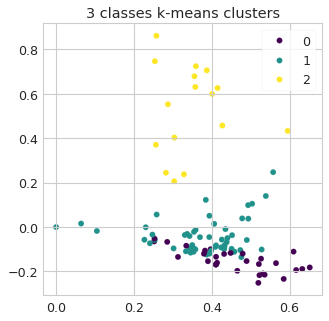

In [95]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(5,5))
scatter = plt.scatter(data_2d[:,0], data_2d[:,1], c=y_pred_clus)
plt.legend(*scatter.legend_elements())
plt.title("3 classes k-means clusters")
plt.savefig("../../figures/3ClassesKMeansClusters")
plt.show()

## Visualize actual classes

In [86]:
wiki=pd.DataFrame(list(zip(df['filename'],clusters)),columns=['filename','cluster'])
wiki.to_csv('../../3ClassesKMeansClusters.csv', index=False)

In [87]:
wiki.cluster.unique()

array([2, 1, 0])

Cluster: 0
Titles
                                 Profil_MAPAQ_2020
                                 Projet_Borée_2020
                        Politique_QuébecSanté_2017
      Présentation du projet Autonomie alimentaire
                  Rapport_régional_Hub_V15juin2020
                        Objectif_VivreEnVille_2020
          Stratégie_QuébecAffairesMunicipales_2020
               Rapport_Hub_Cocréation_Mashteuiatsh
Rapport_cocréation_MRC_LSJE_Hub_Version finale_...
Rapport de consultation - Relance économique SL...
Rapport_MRC_Maria-Chapdelaine_cocréation_Hub_Ve...
                                      Charte borée
                     Enquête_AmbassadeBoréale_2020
                                PDAA_MRCMAria_2018
           Synthèse_ForumSainesHabitudesDeVie_2018
                            Priorités_FRR_DDR_2020
                               Rapport_Ecobes_2007
Rapport_Ville_de_Saguenay_cocréation_Hub_Versio...
                             Politique_MRCDDR_2019
             

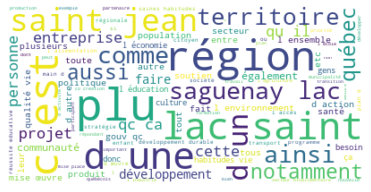

Cluster: 1
Titles
                        PlanActionDD_MSSS_2016
              Pland_action_ServicesQuébec_2018
                           Guide_Saguenay_2010
                   Plan_Québecautochtones_2017
               Politique_QuébecTransports_2018
                          Perspective_IMT_2011
                            Plan_Saguenay_2015
                            Rapport_CREDD_2019
                        PAFIT_QuébecForet_2018
                       ApprocheDD2_Résolu_2020
                      Revue_BlackburnEtAl_2017
                       Rapport_MigrAction_2015
                       Plan_QuébecTravail_2017
                        Rapport_Femmessor_2019
                       Priorités_MRCMaria_2020
               PlanStratégique_CégepStFélicien
                         PlanAction_CREDD_2021
                  ACCUEILLIR_LA_PETITE_ENFANCE
                      ApprocheDD_RioTinto_2020
           PlanAnnexe_QuébecEnvironnement_2020
                Orientations_GroupeCODERR_

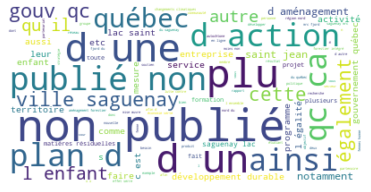

Cluster: 2
Titles
                      Rapport_SADCHS_2018
                       Bulletin_SPBQ_2020
           Rapport_MicroEntreprendre_2018
         Rapport_QuébecEnvironnement_2019
            PlanAction_JardinMistouk_2017
        Rapportd_activités_Alliage02_2019
               Politique_CultureSLSJ_2019
             Politique_ContactNature_2020
              RapportAnnuel_SADCLSJE_2019
                  Plan_ContactNature_2020
PolitiqueDD_OrchestreSymphoniqueSLSJ_2017
                     Buletin_SPBQ_Oct2020
                     Rapport_ESSOR02_2019
                         SADR_MRCDDR_2015
             Charte_TourismeAventure_2020
        RapportAnnuel_JardinsMistouk_2016


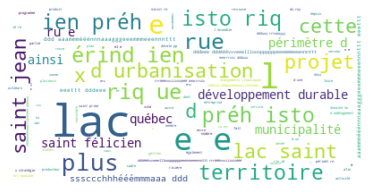

In [93]:
from wordcloud import WordCloud
result={'cluster':clusters,'wiki':list(df.text)}
result=pd.DataFrame(result)
for k in range(0,num_clusters):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    filtered_words=[]
    for word in text.split():
        if re.search('[a-zA-ZÀ-ÿ]', word):
            if word not in stop_words:
                filtered_words.append(word)
    text=' '.join(filtered_words)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki[wiki.cluster==k]['filename']         
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()